In [1]:
import numpy as np
from sampler import Sampler, load_from_files
from s_manager import SManager
import hickle, os
import matplotlib.pyplot as plt
import copy
plt.rcParams['figure.figsize'] = [10, 20]

def all_chi2(vis):
    print("Expected chi2", np.mean(vis.chi2["Jee"][0]))
    if vis.is_redundant: print("calculated chi2 by redcal", vis.get_chi2(over_all=True))
    for dof in [ "default", "as_if_redundant", "as_if_non_redundant", "use_nvis" ]:
        for use_noise in [ True, False ]:
            print("calculated chi2 by equation, dof", dof, "use_noise", use_noise, vis.get_chi2_eqn(dof=dof, use_noise=use_noise))


In [10]:
sampler = load_from_files("SAMPLER_DIR")
#sampler = load_from_files("/data/scratch/apw737/catall_nobright/sampled_viscatBC")#
print(sampler.vis_redcal.redundant_groups)
name = os.path.basename("SAMPLER_DIR")


304 modes selected out of 1216 (25.0%)
Running sampling
Time accumulated: 0. Memory: 0.14 GB
Iter 0
Time accumulated: 0.5 s, 0.01 m, 0.0 h. Time since last report: 0.5 s, 0.01 m, 0.0 h.
Memory: 0.14 GB. Memory change since last report: 0.0 GB.


In [ ]:
all_chi2(sampler.vis_redcal)
all_chi2(sampler.vis_sampled)

In [ ]:
redcal_log = abs(sampler.vis_redcal.get_unnormalized_likelihood(over_all=True, unity_N=False, exp=False))
sampled_log = abs(sampler.vis_sampled.get_unnormalized_likelihood(over_all=True, unity_N=False, exp=False))
print("abs Log posterior", redcal_log, ">", sampled_log, "?")
if redcal_log <= sampled_log:
    print("Sampler has not improved the calibration")
else: print("Ok")
redcal_rms = sampler.vis_redcal.get_rms()
sampled_rms = sampler.vis_sampled.get_rms()
print("RMS", redcal_rms, ">", sampled_rms, "?")
if redcal_rms <= sampled_rms:
    print("Sampler has not improved the calibration")
else: print("Ok")
    
if sampler.vis_redcal.is_redundant():
    redcal_chi2 = sampler.vis_redcal.get_chi2(over_all=True)
    sampled_chi2 = sampler.vis_sampled.get_chi2(over_all=True)
    print("Expected chi2", np.mean(sampler.vis_redcal.chi2["Jee"]))
    print("CHI2", redcal_chi2, ">", sampled_chi2, "?")
    if redcal_chi2 <= sampled_chi2:
        print("Sampler has not improved the calibration")
    else: print("Ok")

Plot corner
[19, 27]
g values: 8, V values: 4


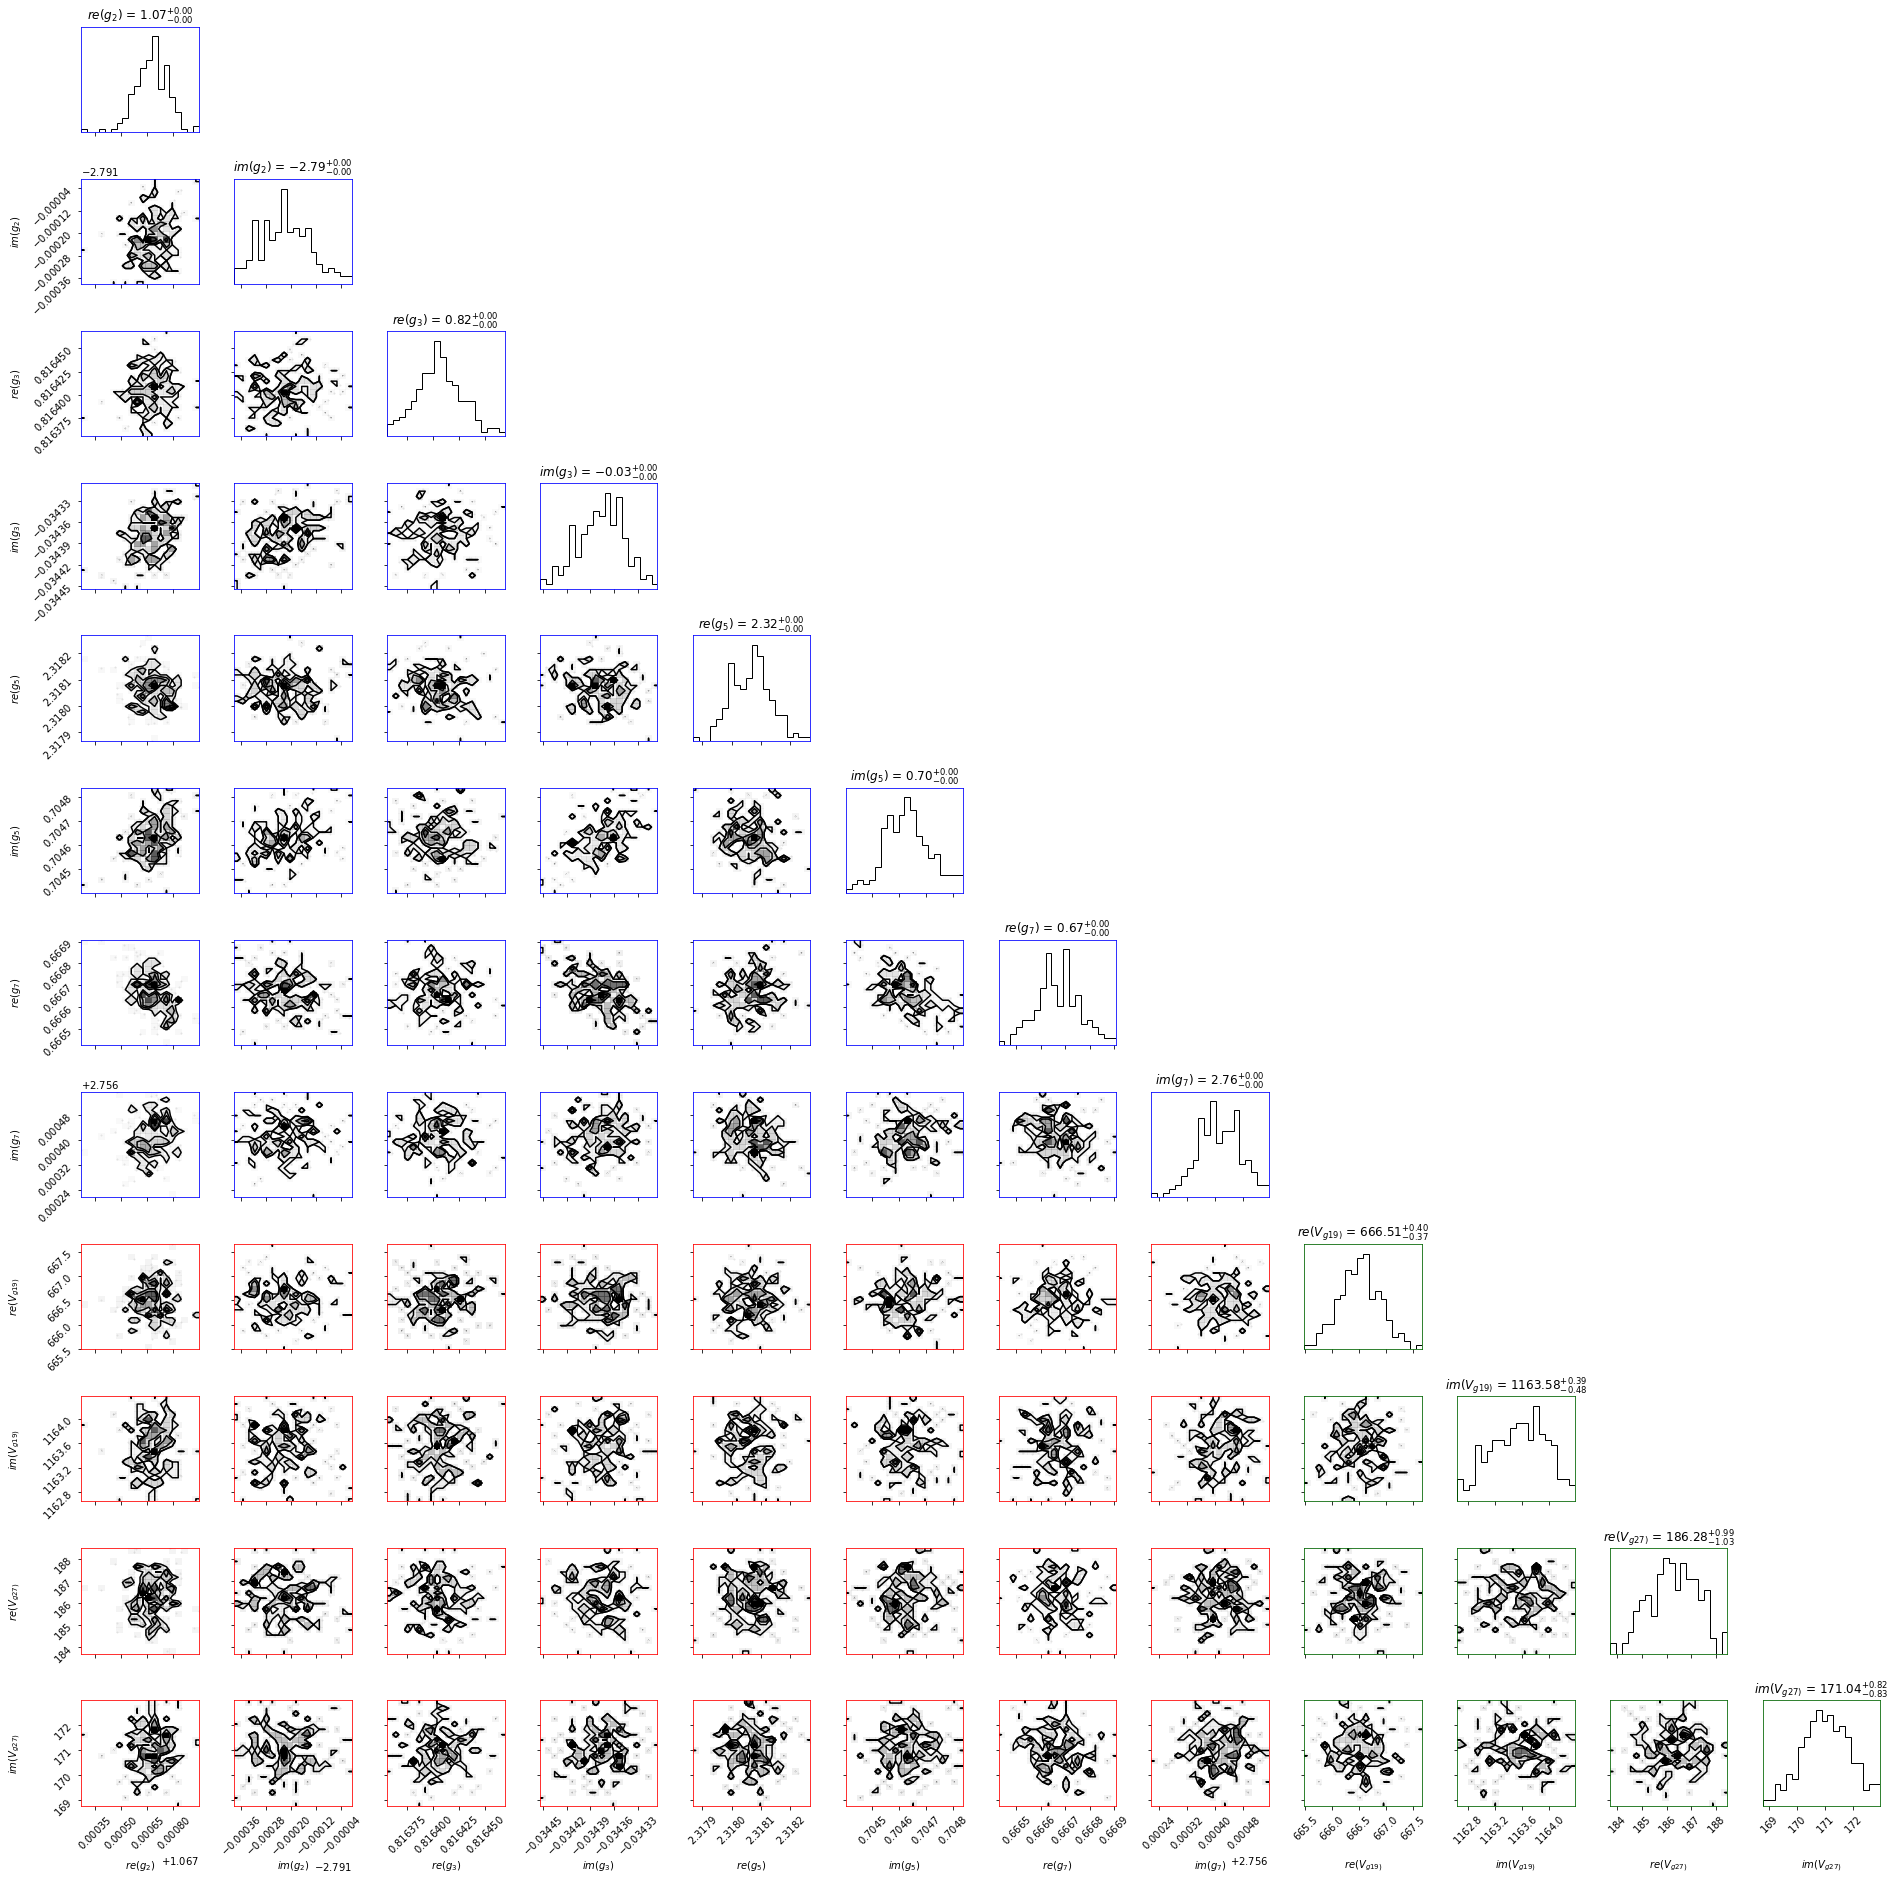

In [11]:
sampler.plot_corner(["g", "V"], time=6, freq=3, baselines=[19, 27], plot_to=name+"_corner1")

In [ ]:
sampler.plot_corner(["g", "V"], time=6, freq=3, baselines=[19, 32], plot_to=name+"_corner2")

In [ ]:
sampler.plot_corner(["x", "V"], time=6, freq=3, baselines=[10, 20, 30])

In [ ]:
sampler.plot_corner(["x", "V"], time=6, freq=3, baselines=[3, 16, 34])

In [ ]:
sampler.plot_covcorr(["g", "V"], log=True, plot_to=name+"_corr")

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
sampler.plot_covcorr(["x", "V"], log=True, hist=True)

In [ ]:
plt.rcParams['figure.figsize'] = [14, 14]
sampler.plot_marginals("x", cols=4, time=0, freq=0, which=["Sampled"])

In [ ]:
plt.rcParams['figure.figsize'] = [14, 16]
sampler.plot_marginals("V", cols=4, time=0, freq=0, which=["Redcal", "Sampled"])

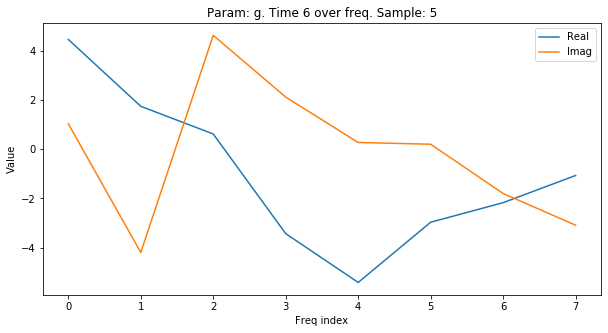

In [15]:
plt.rcParams['figure.figsize'] = [10, 5]
sampler.plot_one_over_time_freq("g", 5000, 6, time=6, plot_to=name+"_g_one_over1")

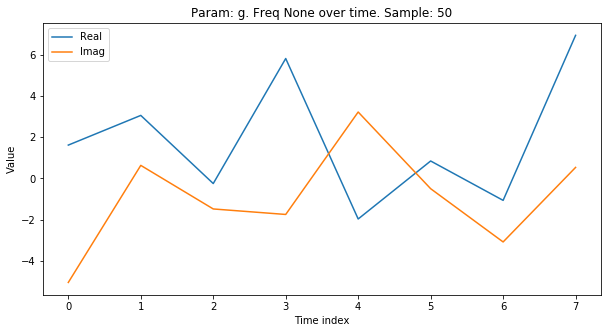

In [17]:
sampler.plot_one_over_time_freq("g", 5000, 6, freq=7, plot_to=name+"_g_one_over2")

In [ ]:
sampler.plot_one_over_time_freq("x", 5000, 6, time=6, plot_to=name+"_x_one_over1")

In [ ]:
sampler.plot_one_over_time_freq("x", 5000, 6, freq=7, plot_to=name+"_x_one_over2")

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
sampler.plot_gains(time=6, freq=3, sigma=3, plot_to=name+"gains")

In [ ]:
sampler.print_sample_stats("x", time=3, freq=3)

In [ ]:
sampler.print_sample_stats("V", time=0, freq=6)

In [ ]:
sampler.examine_all_for_gaussianity()

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
sampler.vis_redcal.plot_power_spectrum()

In [ ]:
sampler.vis_sampled.plot_power_spectrum()

In [ ]:
sampler.plot_gains(time=1, freq=1)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]
sampler.plot_results(time=1, freq=1)

In [ ]:
print("Finished SAMPLER_DIR")